# COVID-19 Clinical Trials dataset: an EDA

### EDA Plan of Attack
1. **High-level understanding of data**
    - First, I will take down notes about the data from the Kaggle descriptions
    - I might also check out the associated notebook to get a better sense
2. **Brainstorm some questions** I would like to ask and analyze the data for.
    - I will probably also get inspiration from the aforementioned notebook
3. **Learn as I go!** Specifically, my goals for this EDA are:
    - get more comfortable working with the basic packages like Numpy and Pandas
    - get used to graphing using matplotlib library since that's the most common one

### Overall timeline goal
- Today is February 25, 2021; I would like to finish this project in maximum 1 week, so March 4th at the latest.

### Some quick notes on the data

- Maintained by the NIH, the database "ClinicalTrials.gov" contains information about all privately and publicly funded clinical studies around the world.
- The particular dataset to be used consists of clinical trials related to COVID-19 studies specifically.
    - XML files: each correspond to one study; filename: `NCT#####` where the `#`'s indicate unique identifier of study.
    - 1 CSV file: not as detailed as above but provides a summary.

<br>

## Higher-level analysis of data

In [2]:
## Importing relevant modules

# libraries
import pandas as pd
import numpy as np
import os
from xml.etree import ElementTree

# data viz
import matplotlib.pyplot as plt
import seaborn as sns

# Read file data
path = '../pythonProject/covid19-clinical-trials-dataset/'
xml_path = path + 'COVID-19 CLinical trials studies/COVID-19 CLinical trials studies/'
list_of_files = os.listdir(xml_path)
print('Total clinical trials:', len(list_of_files))

Total clinical trials: 5020


In [3]:
# .xml to pandas dataframe;
# for most of this part I will be copying the referencing the original notebook's code because I'm not focused on learning how to do this for now.

df_studies = pd.DataFrame()
list_keywords = []

for file in list_of_files:
    file_pathname = xml_path + file

    tree = ElementTree.parse(file_pathname)
    root = tree.getroot()

    # create dictionary to be turned into a df
    trial = {}

    trial['id'] = root.find('id_info').find('nct_id').text
    trial['overall_status'] = root.find('overall_status').text
    trial['study_type'] = root.find('study_type').text

    if root.find('start_date') != None:
        trial['start_date'] = root.find('start_date').text
    else:
        trial['start_date'] = ''

    if root.find('enrollment') != None:
        trial['enrollment'] = root.find('enrollment').text
    else:
        trial['enrollment'] = ''

    trial['condition'] = root.find('condition').text.upper().\
        replace('CORONAVIRUS INFECTIONS','CORONAVIRUS INFECTION').\
        replace('CORONA VIRUS INFECTION','CORONAVIRUS INFECTION').\
        replace('SARS-COV-2','SARS-CoV2').\
        replace('SARS-COV 2','SARS-CoV2').\
        replace('SARS-COV2','SARS-CoV2').\
        replace('COVID-19','COVID').\
        replace('COVID19','COVID').\
        replace('COVID 19','COVID')

    if root.find('location_countries') != None:
        trial['location_countries'] = root.find('location_countries').find('country').text.upper()
    else:
        trial['location_countries'] = ''

    if root.find('intervention') != None:
        trial['intervention'] = root.find('intervention').find('intervention_name').text.upper()
    else:
        trial['intervention'] = ''

    for entry in root.findall('keyword'):
        list_keywords.append(entry.text)

    if root.find('official_title') == None:
        trial['title'] = root.find('brief_title').text
    else:
        trial['title'] = root.find('official_title').text

    date_string = root.find('required_header').find('download_date').text
    trial['date_processed'] = date_string.replace('ClinicalTrials.gov processed this data on ', '')

    trial['sponsors'] = root.find('sponsors').find('lead_sponsor').find('agency').text

    df_studies = df_studies.append(trial, ignore_index=True)

In [4]:
# print the first few rows of studies dataframe and describe it
df_studies.head()

,condition,date_processed,enrollment,id,intervention,location_countries,overall_status,sponsors,start_date,study_type,title
0,"SOLID TUMOR, ADULT","February 08, 2021",1000,NCT00571389,,UNITED STATES,Recruiting,"BioCytics, Inc.",November 2007,Observational,A Study to Facilitate Development of an Ex-Viv...
1,HAIRY CELL LEUKEMIA (HCL),"February 08, 2021",1263,NCT01087333,,UNITED STATES,Recruiting,National Cancer Institute (NCI),"March 2, 2010",Observational,Collection of Human Samples to Study Hairy Cel...
2,BREAST CANCER,"February 08, 2021",935,NCT01134172,SURVEY WEB-BASED OR TELEPHONE INTERVIEW,UNITED STATES,"Active, not recruiting",Memorial Sloan Kettering Cancer Center,May 2010,Observational,Breast Cancer and the Workforce: Ethnic Differ...
3,ANOGENITAL HERPES,"February 08, 2021",1000,NCT01306084,,UNITED STATES,Recruiting,National Institute of Allergy and Infectious D...,"March 15, 2011",Observational,Viral Infections in Healthy and Immunocompromi...
4,HIV-1 INFECTION,"February 08, 2021",334,NCT01435018,ETOPOSIDE (ET),BRAZIL,Completed,AIDS Clinical Trials Group,"October 1, 2013",Interventional,A Randomized Comparison of Three Regimens of C...


In [5]:
df_studies.describe()


,condition,date_processed,enrollment,id,intervention,location_countries,overall_status,sponsors,start_date,study_type,title
count,5020,5020,5020,5020,5020,5020,5020,5020,5020,5020,5020
unique,1140,1,838,5020,3183,113,11,2194,560,4,5005
top,COVID,"February 08, 2021",100,NCT04341389,,UNITED STATES,Recruiting,Assistance Publique - Hôpitaux de Paris,"May 1, 2020",Interventional,COVID-19 Outpatient Pragmatic Platform Study (...
freq,2374,5020,309,1,761,1085,2505,91,107,2892,3


In [6]:
# FOR LATER ON: Some study names are repeated in the dataset. Why?
print(df_studies[df_studies['title'] == df_studies.describe().iloc[2]['title']])

     condition     date_processed enrollment           id intervention  \
4434     COVID  February 08, 2021        120  NCT04662060  ACEBILUSTAT   
4435     COVID  February 08, 2021        120  NCT04662073     CAMOSTAT   
4436     COVID  February 08, 2021        240  NCT04662086  ACEBILUSTAT   

     location_countries      overall_status             sponsors  start_date  \
4434      UNITED STATES  Not yet recruiting  Stanford University  March 2021   
4435      UNITED STATES  Not yet recruiting  Stanford University  March 2021   
4436      UNITED STATES  Not yet recruiting  Stanford University  March 2021   

          study_type                                              title  
4434  Interventional  COVID-19 Outpatient Pragmatic Platform Study (...  
4435  Interventional  COVID-19 Outpatient Pragmatic Platform Study (...  
4436  Interventional  COVID-19 Outpatient Pragmatic Platform Study (...  


In [7]:
# Load the CSV file as well
df_studies_CSV = pd.read_csv( path + 'COVID clinical trials.csv')
df_studies_CSV.head()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
1,2,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482
2,3,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020",NaN,"June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",NaN,https://ClinicalTrials.gov/show/NCT04416061
3,4,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020",NaN,"June 4, 2020","CHR Orléans, Orléans, France",NaN,https://ClinicalTrials.gov/show/NCT04395924
4,5,NCT04516954,Convalescent Plasma for COVID-19 Patients,CPCP,Enrolling by invitation,No Results Available,COVID 19,Biological: Convalescent COVID 19 Plasma,Evaluate the safety|Change in requirement for ...,Vinmec Research Institute of Stem Cell and Gen...,...,ISC.20.11.1,"August 1, 2020","November 30, 2020","December 30, 2020","August 18, 2020",NaN,"August 20, 2020",Vinmec Research Institute of Stem cell and Gen...,NaN,https://ClinicalTrials.gov/show/NCT04516954


In [8]:
# What's in the CSV that's not listed in the XML data? Or at least lost in translation to dfs?
print(list(df_studies.columns))
print(list(df_studies_CSV.columns))

['condition', 'date_processed', 'enrollment', 'id', 'intervention', 'location_countries', 'overall_status', 'sponsors', 'start_date', 'study_type', 'title']
['Rank', 'NCT Number', 'Title', 'Acronym', 'Status', 'Study Results', 'Conditions', 'Interventions', 'Outcome Measures', 'Sponsor/Collaborators', 'Gender', 'Age', 'Phases', 'Enrollment', 'Funded Bys', 'Study Type', 'Study Designs', 'Other IDs', 'Start Date', 'Primary Completion Date', 'Completion Date', 'First Posted', 'Results First Posted', 'Last Update Posted', 'Locations', 'Study Documents', 'URL']


Oddly enough, the raw CSV file seems to contain more information than the processed version of the XML file, whereas the
CSV file was supposed to be the more condensed version of it. I guess the original notebook poster was trying to extract
only the most pertinent information from xml to dataframe.

<br>

## Brainstorming questions I'd like to ask

To start the EDA, let's look at a few of the columns in `df_studies` (i.e. the one that's been summarized better) in
more detail!

In [9]:
list_dfColumns = list(df_studies.columns)
print(list_dfColumns)

['condition', 'date_processed', 'enrollment', 'id', 'intervention', 'location_countries', 'overall_status', 'sponsors', 'start_date', 'study_type', 'title']


Some questions I would like to ask throughout this analysis:

1. Regarding the entire dataset:
    - What are the conditions (COVID- and non-COVID-related) that are being studied?
    - What status is each study in?
    - In which countries do studies take place? Which of those are COVID-related ones?
    - What are the study types used? Do COVID-related studies differ from the rest?
        - What's the distribution of enrollment sizes for study types?
    - From the CSV file column description in original dataset post, there is a very small number of studies with results
    available (1%). What percentage is this of the actual studies that have already been completed?

2. In COVID-related studies:
    - Study titles:
        - Why are some titles repeated?
        - What are the common keywords in the title?
            - What can we learn from those titles?
    - Specific to **observational studies**:
        - length of each study (from CSV)
        - how is the outcome measured?
    - Specific to **interventional studies**:
        - length of each study (also from CSV)
        - what were some types of interventions used?
        - in drug studies, what were the top 5 most popular ones studied?
    - In the small percentage of studies that actually have results posted, were any of them focused on COVID?
        - If so, can we draw any meaningful conclusions?

<br>

## Exploratory analysis

### Comparison of COVID- and non-COVID-related studies

#### Conditions being studied
First, I ask what conditions (COVID- and non-COVID-related) are being studied.

In [25]:
# Use a pie chart: must count incidences of each type
condition_counts = df_studies.condition.value_counts()
conditions_list = list(condition_counts.index)
covid_keys = [
    'covid', 'coronavirus', 'sars-cov2', '2019-ncov', 'severe acute respiratory syndrome coronavirus 2',
]
resp_keys = [
    'severe acute respiratory syndrome', 'sars', 'respiratory', 'pneumonia', 'cold', 'flu'
]

df_studies['study_topic'] = ['']*len(df_studies.condition)

# TODO: This part may need to be modified if the study titles are more accurate indicators of topic (esp. for non-cov, resp ones)
for cond in conditions_list:
    # from the condition chosen, parse for any of the keys string
    if any(key in cond.lower() for key in covid_keys): # condition met as being covid-related:
        # c.append(cond)
        label = 'COVID-related' #label as covid-related
    elif any(key in cond.lower() for key in resp_keys): # condition met as being non-covid but still SARS or other respiratory:
        label = 'Non-COVID-related, Respiratory' #label as non-covid-related respiratory
    else:
        label = 'Non-COVID-related' # label as not related
    df_studies['study_topic'].loc[df_studies.condition == cond] = label

In [29]:
df_studies[['condition','study_topic']].describe()
condition_detailed_counts = df_studies.study_topic.value_counts()
print(condition_detailed_counts)

COVID-related                     3427
Non-COVID-related                 1341
Non-COVID-related, Respiratory     252
Name: study_topic, dtype: int64


  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  contains: unknown
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or variant: {'normal', 'small-caps'}
  fontw

Text(0.5, 1.0, 'What types of conditions were studied?')

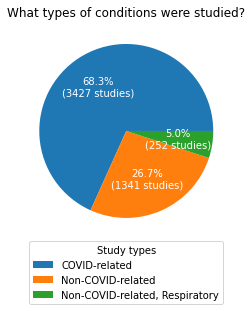

In [50]:
# Create figure!

values = condition_detailed_counts.to_numpy()
labels = condition_detailed_counts.keys().to_numpy()
# print(values, labels)

def pctvalue(pct, data):
    counts = int(pct/100 * np.sum(data))
    return "{:.1f}%\n({:d} studies)".format(pct, counts)

fig, ax = plt.subplots(subplot_kw=dict(aspect='equal'))
wedges, texts, autotexts = ax.pie(values,
                       textprops=dict(color="w"),
                       autopct=lambda pct: pctvalue(pct,values))

ax.legend(wedges, labels,
          title="Study types",
          loc="center",
          bbox_to_anchor=(0,-0.1,1,-0.1)
          )

plt.setp(autotexts)

ax.set_title("What types of conditions were studied?")


# BONUS TODO: Make the plot interactive using plotly and enable display of all the raw condition names as listed in the datset

#### Study status
Let's visualize what status each of these clinical studies are in.

#### Countries of study
In which countries do studies take place? Which of those are COVID-related ones?

#### Study type: Popular study types depending on condition being studied
What are the study types used? Do COVID-related studies differ from the rest?

#### Enrollment sizes (per study type and per condition)
What's the distribution of enrollment sizes across studies?

#### Common measure of outcome being used for each study type?
What methods do each study types use to measure outcome?

#### Study results?
From CSV file, what results can we find?